In [20]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import sklearn
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
weekend = ['Saturday','Sunday']
def week_day_type(x):
    if x in weekend:
        return 'weekends'
    else:
        return 'weekdays'
def time_slot(x):
    if x in morning:
        return 'morning'
    elif x in afternoon:
        return 'afternoon'
    elif x in evening:
        return 'evening'
    else:
        return 'night'  
df=pd.read_csv("C:/Users/Akash/Documents/ADS/Assignment2/Appliances-energy-prediction-data-master/energydata_complete.csv")
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.weekday_name
df['time_hr_24']=df['date'].dt.hour
df['time_min']=df['date'].dt.minute
df['week_day_type']=df['day_of_week'].map(week_day_type)
morning=range(6,12)
afternoon=range(12,17)
evening=range(17,22)  
df['time_slot']=df['time_hr_24'].map(time_slot)
df.drop(['date'],axis=1,inplace=True)
df=pd.get_dummies(df,prefix=['DOW','TS','WDT'],columns=['day_of_week','time_slot','week_day_type'])
#df=df[(df['Appliances']-df['Appliances'].mean()).abs() <= 3*df['Appliances'].std()]

[]

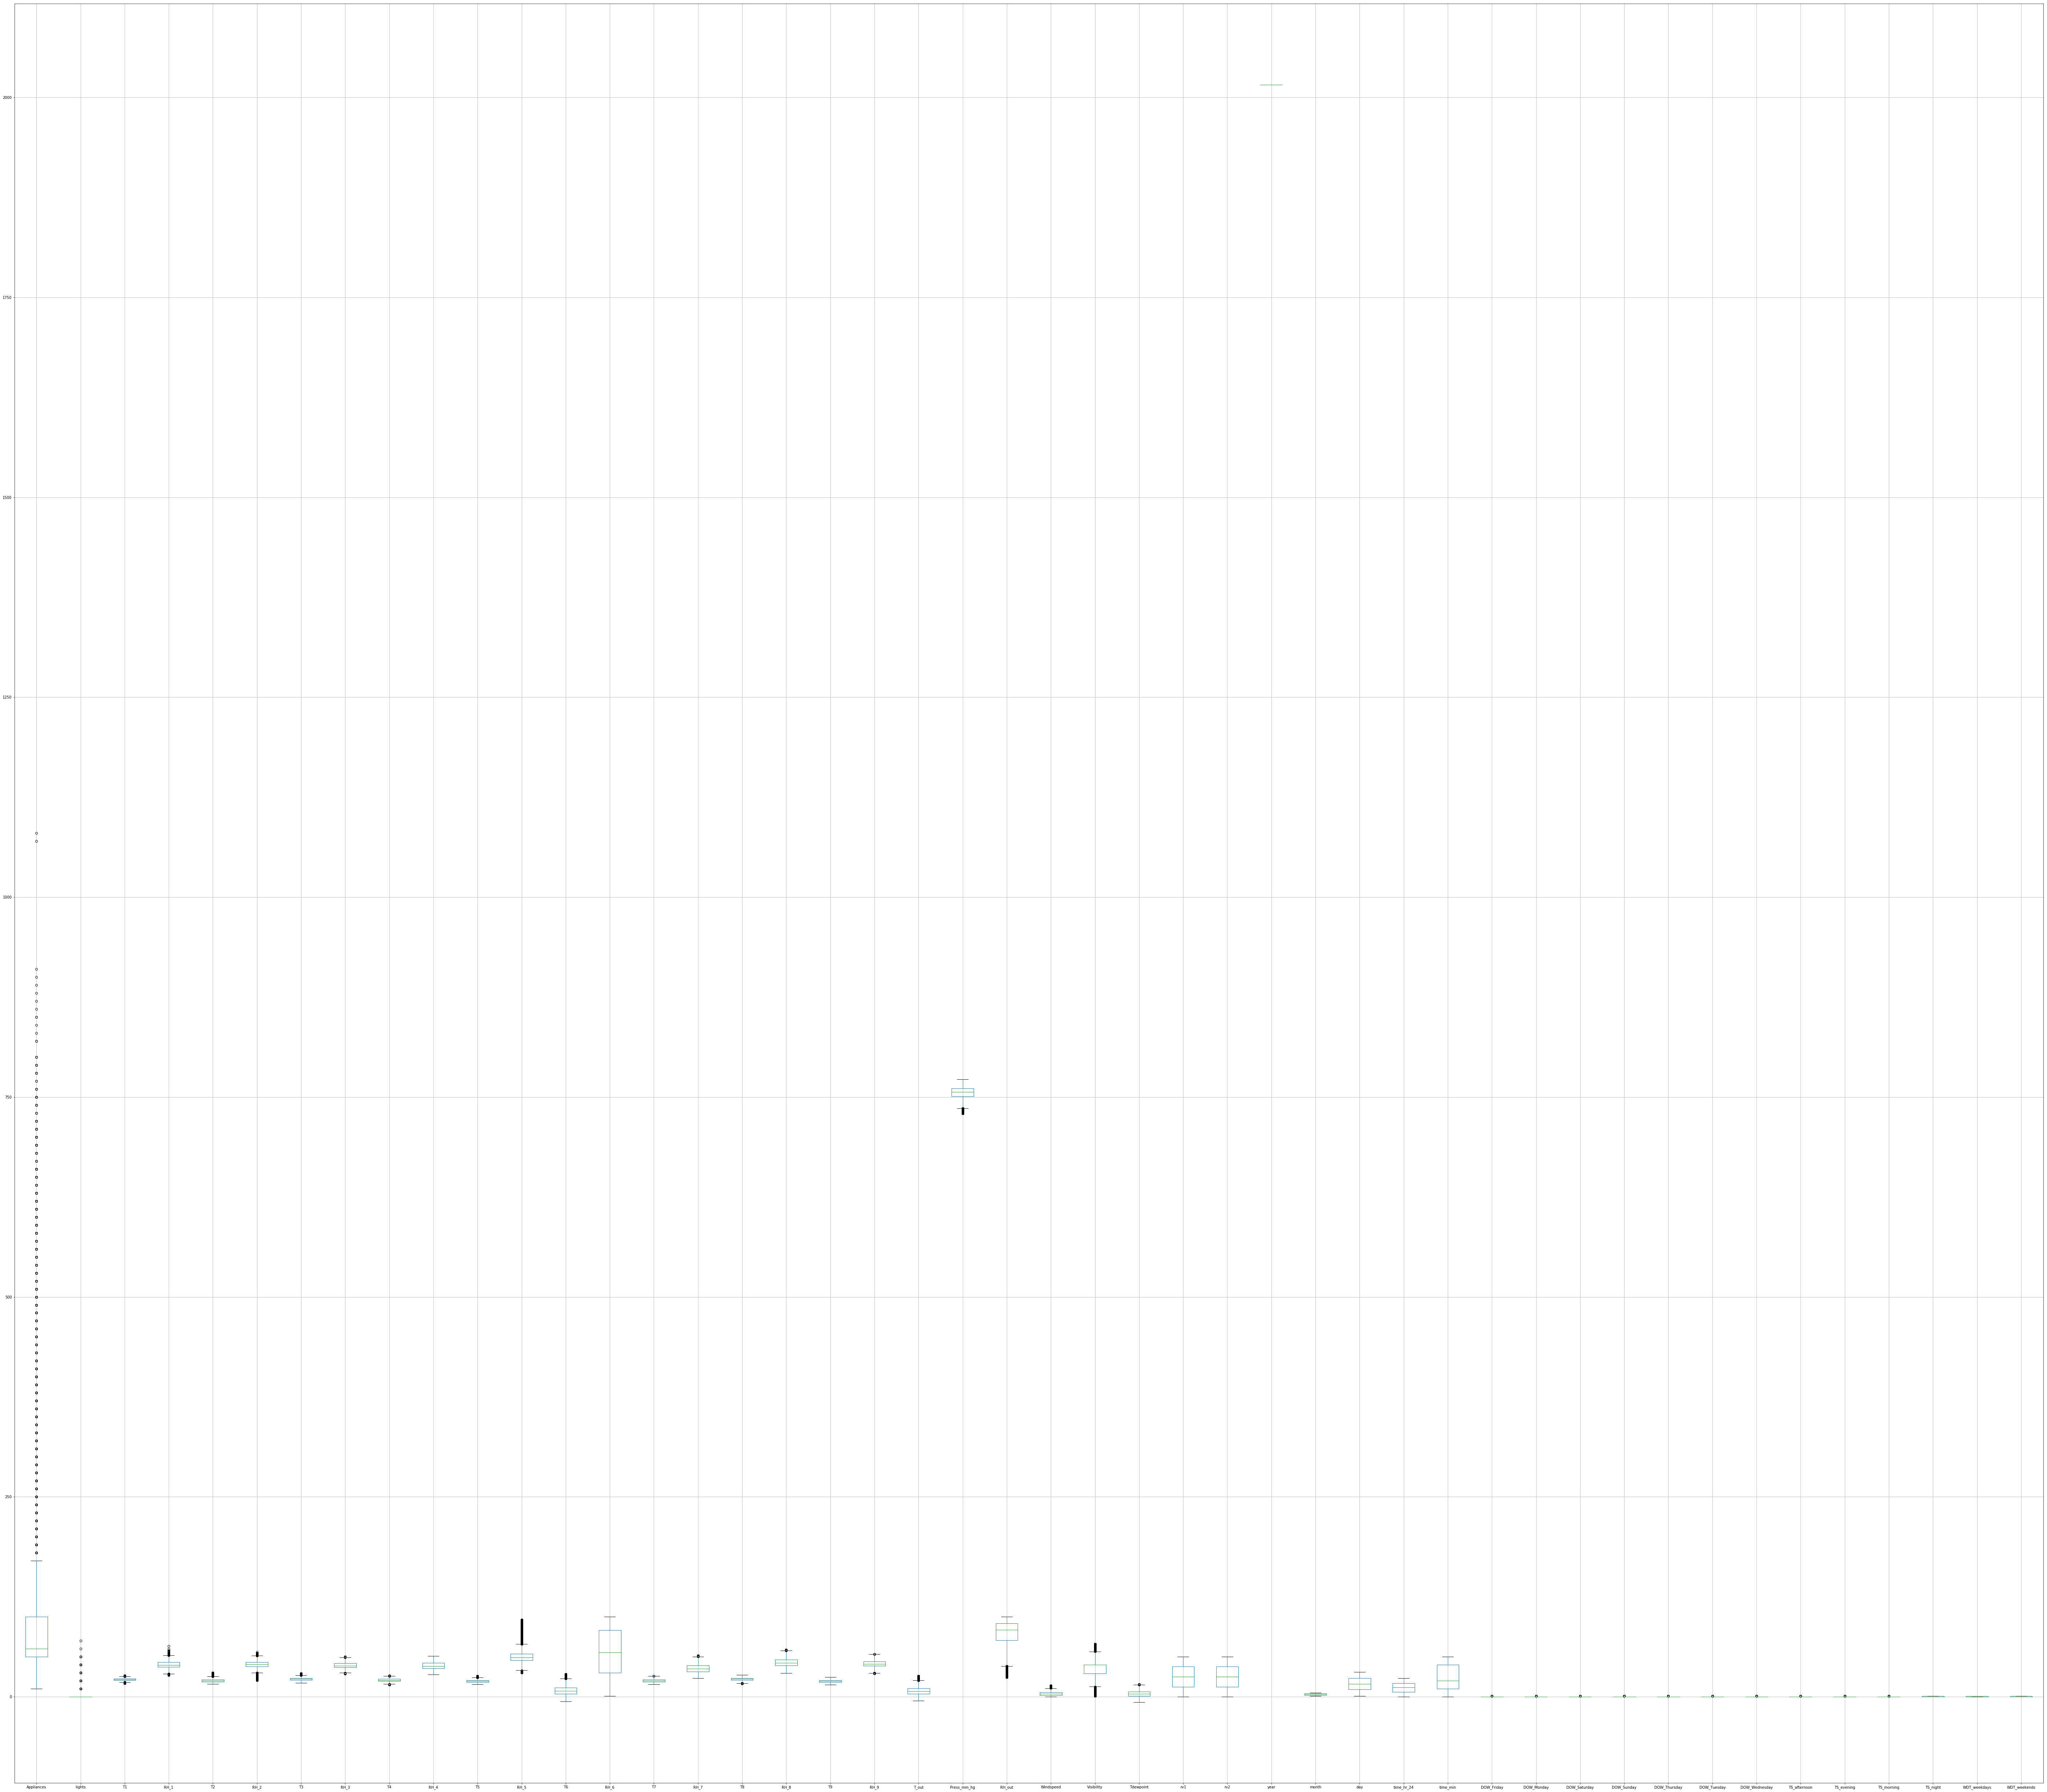

In [14]:
%matplotlib inline
rcParams['figure.figsize']=100,90
df.boxplot(return_type='dict')
plt.plot()

[]

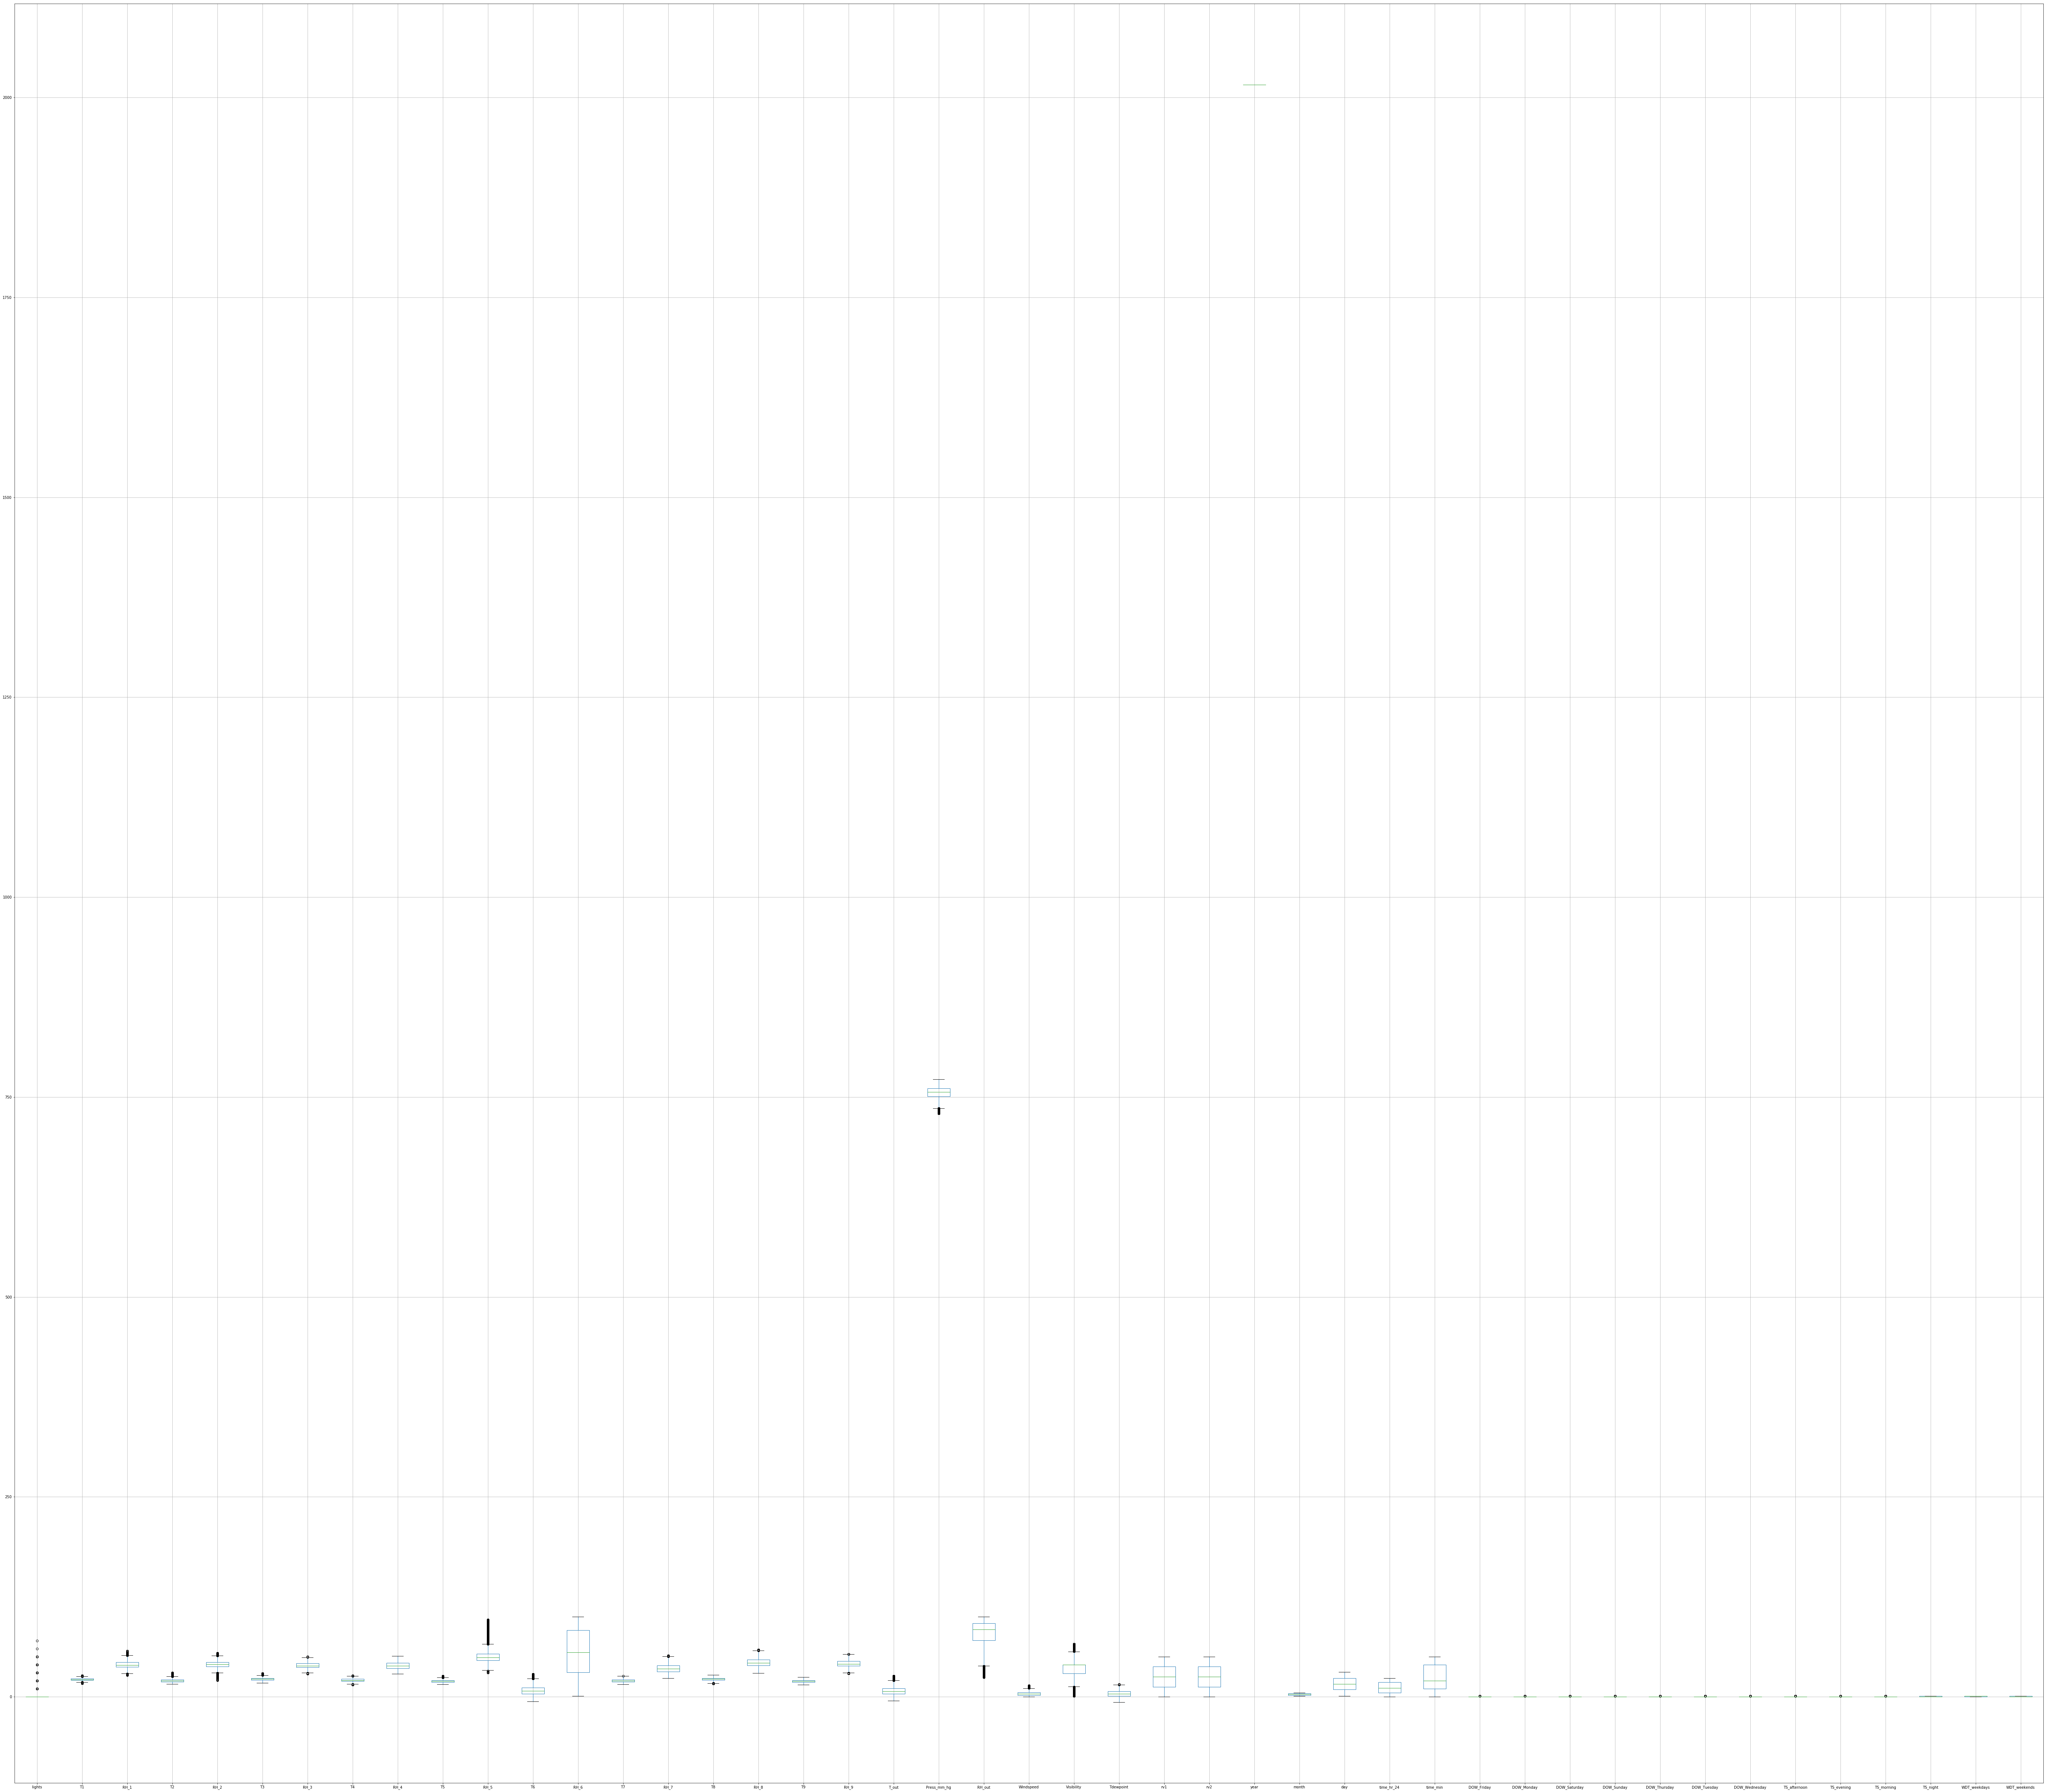

In [21]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)
x_train=df_train.iloc[:,1:]
y_train=df_train['Appliances']
x_train.boxplot(return_type='dict')
plt.plot()

In [22]:
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
# plt.boxplot(x_test_sc)

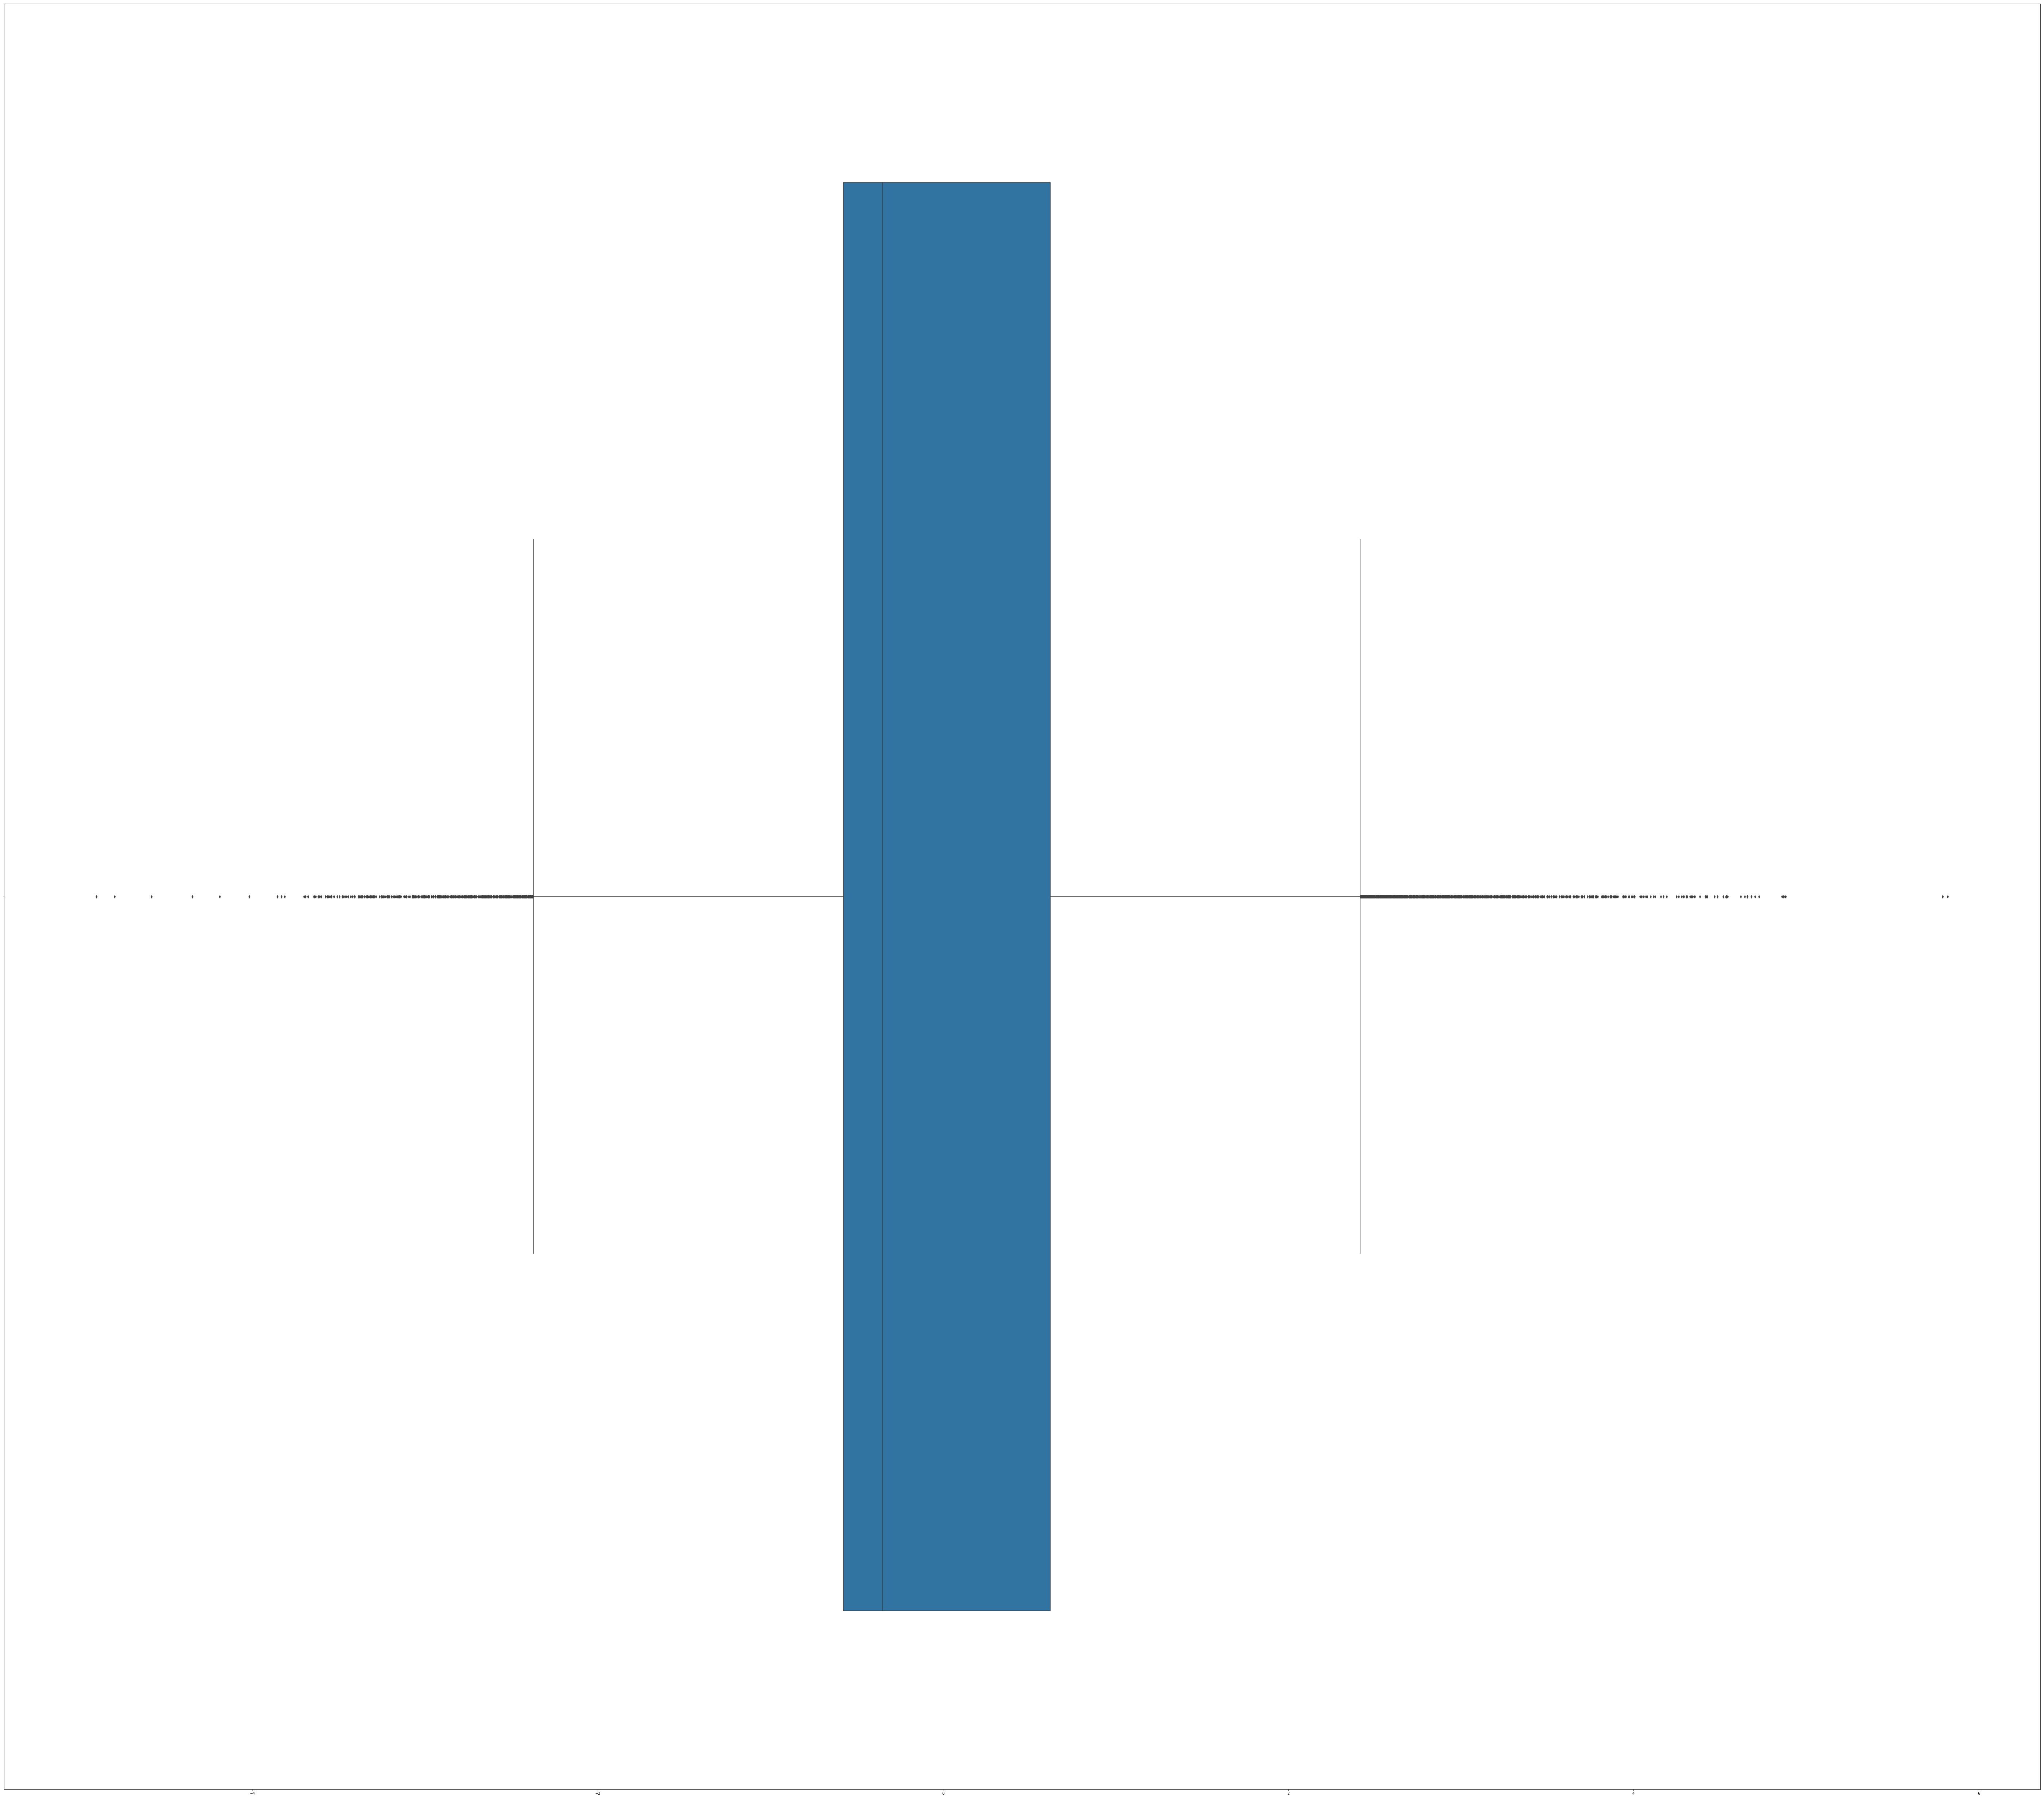

In [24]:
plt.figure()
sns.boxplot(x=x_test_sc)

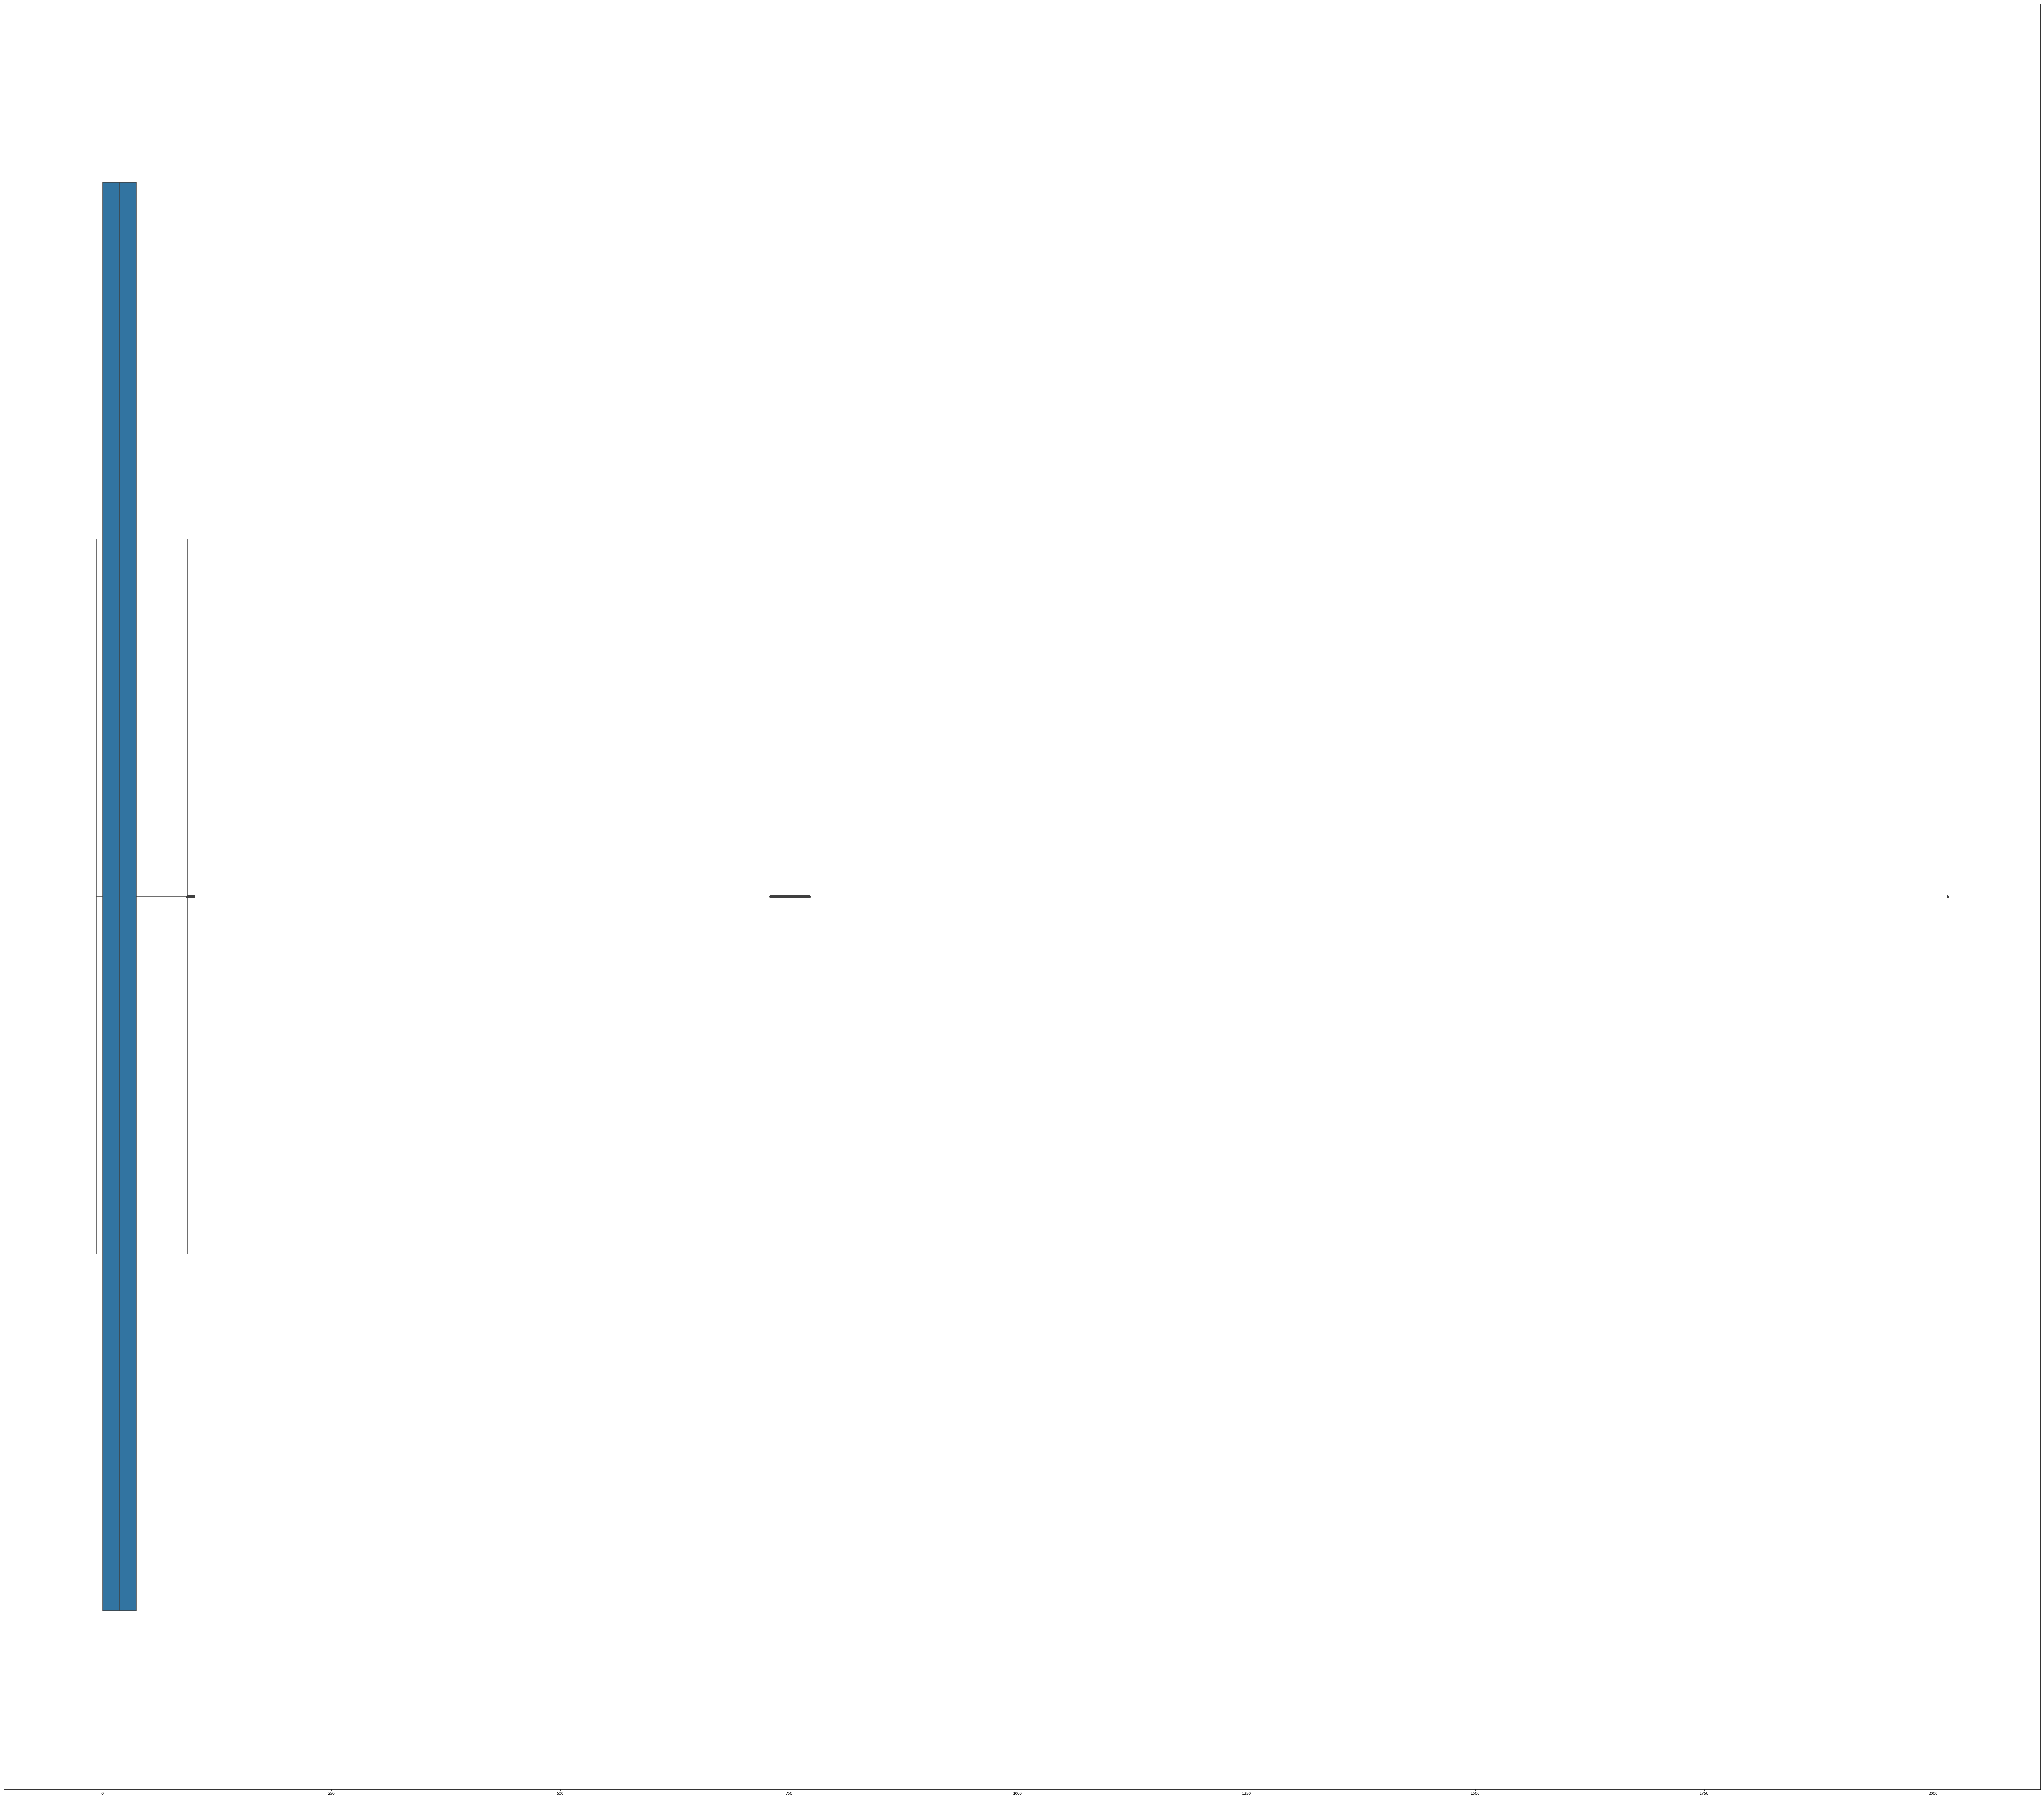

In [25]:
plt.figure()
sns.boxplot(x=x_train)

In [36]:
#df=df[(df['Appliances']-df['Appliances'].mean()).abs() <= 3*df['Appliances'].std()]
x_train_sc

array([[-0.4771991 , -0.11605938, -1.16951306, ...,  1.41068894,
         0.6202607 , -0.6202607 ],
       [-0.4771991 , -1.35891206,  1.08200686, ..., -0.70887349,
         0.6202607 , -0.6202607 ],
       [-0.4771991 , -0.55727208, -1.22664118, ..., -0.70887349,
         0.6202607 , -0.6202607 ],
       ..., 
       [-0.4771991 , -0.86798525, -1.15103044, ...,  1.41068894,
         0.6202607 , -0.6202607 ],
       [-0.4771991 ,  0.06415426, -1.18631545, ..., -0.70887349,
        -1.61222531,  1.61222531],
       [-0.4771991 , -0.2258447 , -0.63939774, ..., -0.70887349,
        -1.61222531,  1.61222531]])